# Imports

In [ ]:
!pip uninstall swift -y

In [ ]:
!pip install uv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 43.6 MB/s eta 0:00:00


In [ ]:
!uv pip install swifter datasets

Using Python 3.11.13 environment at: /usr
Resolved 42 packages in 3.04s
   Building swifter==1.4.0
   Building swifter==1.4.0
   Building swifter==1.4.0
   Building swifter==1.4.0
   Building swifter==1.4.0
      Built swifter==1.4.0
Prepared 1 package in 612ms
Installed 1 package in 1ms
 + swifter==1.4.0


In [ ]:
import pandas as pd
import numpy as np
import swifter
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Exploratory Data Analysis

In [ ]:
df = pd.read_excel("drive/MyDrive/saimeera-dataset/Hackathon E-Commerce Dataset.xlsx")

In [ ]:
df.head()

,TransactionID,QuoteID,CustomerID,QuoteDate,ProductID,ProductCategory,ProductPrice,QuoteAmount,QuoteStatus,ConvertedToSale,OrderDate,Discount,Channel,CustomerAge,Region,PreQuoteVisits,QuoteToOrderTime (hrs),PaymentMethod
0,1,Q1001,C2876,2025-05-21,P373,Electronics,179.30,161.37,Pending,0,NaT,0.10,Web,33.0,Ohio,5.0,NaN,Credit Card
1,2,Q1002,C6543,2025-07-01,P125,Apparel,69.80,62.82,Lost,0,NaT,0.10,App,29.0,California,3.0,NaN,PayPal
2,3,Q1003,C4388,2025-06-15,P809,Home,249.99,237.49,Pending,0,NaT,0.05,Referral,58.0,New York,2.0,NaN,Credit Card
3,4,Q1004,C2720,2025-04-24,P223,Books,22.50,20.25,Lost,0,NaT,0.10,Web,22.0,Texas,4.0,NaN,Gift Card
4,5,Q1005,C5032,2025-07-18,P678,Beauty,89.00,75.65,Won,1,2025-07-19,0.15,App,49.0,Illinois,8.0,10.0,PayPal


In [ ]:
df.isnull().sum()

,0
TransactionID,0
QuoteID,0
CustomerID,0
QuoteDate,0
ProductID,0
ProductCategory,0
ProductPrice,0
QuoteAmount,0
QuoteStatus,0
ConvertedToSale,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   TransactionID           2000 non-null   int64         
 1   QuoteID                 2000 non-null   object        
 2   CustomerID              2000 non-null   object        
 3   QuoteDate               2000 non-null   datetime64[ns]
 4   ProductID               2000 non-null   object        
 5   ProductCategory         2000 non-null   object        
 6   ProductPrice            2000 non-null   float64       
 7   QuoteAmount             2000 non-null   float64       
 8   QuoteStatus             2000 non-null   object        
 9   ConvertedToSale         2000 non-null   int64         
 10  OrderDate               79 non-null     datetime64[ns]
 11  Discount                2000 non-null   float64       
 12  Channel                 2000 non-null   object  

In [ ]:
df['QuoteStatus'].value_counts()

,count
QuoteStatus,
Lost,1455
Pending,466
Won,79


In [ ]:
print(df.describe())
print(df.describe(include='object'))

       TransactionID                      QuoteDate  ProductPrice  \
count    2000.000000                           2000   2000.000000   
mean     1000.500000  2025-05-21 08:59:16.800000256    131.266645   
min         1.000000            2025-03-02 00:00:00      7.800000   
25%       500.750000            2025-04-15 00:00:00     45.900000   
50%      1000.500000            2025-05-22 00:00:00     79.990000   
75%      1500.250000            2025-06-28 00:00:00    199.000000   
max      2000.000000            2025-07-31 00:00:00    499.990000   
std       577.494589                            NaN    120.553090   

       QuoteAmount  ConvertedToSale                      OrderDate  \
count  2000.000000       2000.00000                             79   
mean    115.590020          0.03950  2025-05-23 20:39:29.620253184   
min       7.410000          0.00000            2025-03-12 00:00:00   
25%      40.800000          0.00000            2025-04-17 12:00:00   
50%      71.400000          

In [ ]:
print((df['QuoteStatus'] == 'Won').sum())
print((df['QuoteStatus'] == 'Pending').sum())
print((df['QuoteStatus'] == 'Lost').sum())

79
466
1455


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

[np.int64(10), np.int64(21), np.int64(14), np.int64(17), np.int64(12), np.int64(5)]


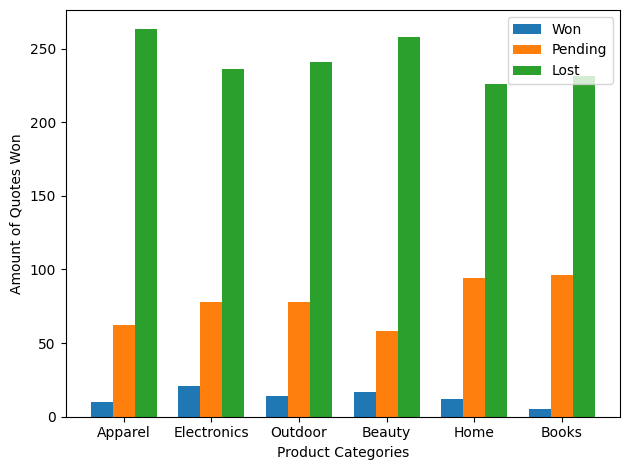

In [ ]:
categories = list(set(df['ProductCategory']))
cat_won = []
cat_pending = []
cat_lost = []
bar_width = 0.25
ind = np.arange(len(categories))

for i in categories:
  cat = (df['ProductCategory'] == i)
  won = (df['QuoteStatus'] == 'Won')
  pending = (df['QuoteStatus'] == 'Pending')
  lost = (df['QuoteStatus'] == 'Lost')

  cat_pending.append((cat&pending).sum())
  cat_lost.append((cat&lost).sum())
  cat_won.append((cat&won).sum())
print(cat_won)

plt.xlabel('Product Categories')
plt.ylabel('Amount of Quotes Won')


plt.bar(ind - bar_width, cat_won, bar_width, label='Won')
plt.bar(ind, cat_pending, bar_width, label='Pending')
plt.bar(ind + bar_width, cat_lost, bar_width, label='Lost')
plt.xticks(ind, categories)
plt.legend()
plt.tight_layout()
plt.show()


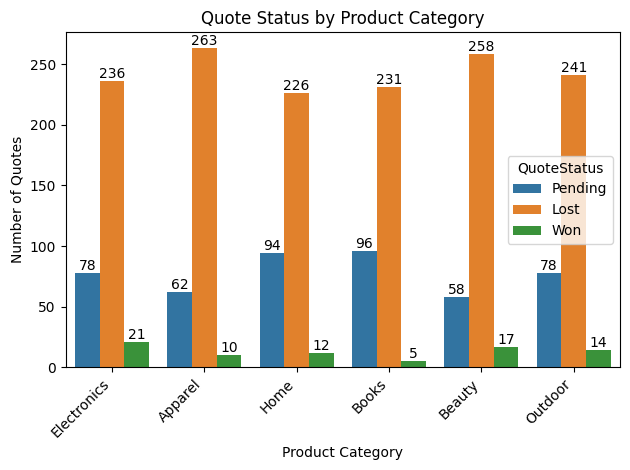

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# The countplot function does all the work:
# It counts occurrences for the 'ProductCategory' column
# and splits the bars based on the 'QuoteStatus' column.
ax = sns.countplot(data=df, x='ProductCategory', hue='QuoteStatus')
for container in ax.containers:
  ax.bar_label(container)

# --- Formatting ---
plt.title('Quote Status by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Quotes')
plt.xticks(rotation=45, ha='right') # Rotate labels to prevent overlap
plt.tight_layout() # Adjust plot to ensure everything fits
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# The countplot function does all the work:
# It counts occurrences for the 'ProductCategory' column
# and splits the bars based on the 'QuoteStatus' column.
sns.countplot(data=df, x='PaymentMethod', hue='QuoteStatus')

# --- Formatting ---
plt.title('Quote Status by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Quotes')
plt.xticks(rotation=45, ha='right') # Rotate labels to prevent overlap
plt.tight_layout() # Adjust plot to ensure everything fits
plt.show()

# Preprocessing

## Cleaning Dataset

In [ ]:
def preprocess(df, columns_to_drop, categorical_features):

  clean_df = df.drop(columns=columns_to_drop).copy()

  clean_df['PaymentMethod'] = clean_df['PaymentMethod'].replace('GifT Card', 'Gift Card')
  clean_df['PaymentMethod'] = clean_df['PaymentMethod'].replace('Bank Transfer', 'Bank_Transfer')
  clean_df['ProductID'] = clean_df['ProductID'].swifter.apply(lambda x: x[1:], 1)


  for f in categorical_features:
    clean_df[f] = clean_df[f].str.lower()

  clean_df['Month'] = clean_df['QuoteDate'].dt.month
  clean_df['Day'] = clean_df['QuoteDate'].dt.day

  clean_df = clean_df.drop('QuoteDate',axis=1).copy()

  clean_df = clean_df[clean_df['QuoteStatus'].isin(['Won', 'Lost'])].copy()

  clean_df['CustomerAge'] = clean_df['CustomerAge'].fillna(df['CustomerAge'].median())
  clean_df['Region'] = clean_df['Region'].fillna(df['Region'].value_counts().idxmax())

  clean_df['PreQuoteVisits'] = clean_df['PreQuoteVisits'].fillna(df['PreQuoteVisits'].median())
  clean_df['PaymentMethod'] = clean_df['PaymentMethod'].fillna(df['PaymentMethod'].value_counts().idxmax())
  return clean_df


In [ ]:
columns_to_drop = [
    'OrderDate',
    'QuoteToOrderTime (hrs)',
    'TransactionID',
    'QuoteID',
    'CustomerID',
    'ConvertedToSale'
]

categorical_features = ['Region', 'ProductCategory', 'PaymentMethod', 'Channel']


processed_df = preprocess(df,
                      columns_to_drop=columns_to_drop,
                      categorical_features= categorical_features
                      )

Pandas Apply:   0%|          | 0/2000 [00:00<?, ?it/s]

## feature engineering

In [ ]:
processed_df['QuoteStatus']=processed_df['QuoteStatus'].map( {'Won': 1, 'Lost':0})

In [ ]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1534 entries, 1 to 1999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ProductID        1534 non-null   object 
 1   ProductCategory  1534 non-null   object 
 2   ProductPrice     1534 non-null   float64
 3   QuoteAmount      1534 non-null   float64
 4   QuoteStatus      1534 non-null   int64  
 5   Discount         1534 non-null   float64
 6   Channel          1534 non-null   object 
 7   CustomerAge      1534 non-null   float64
 8   Region           1534 non-null   object 
 9   PreQuoteVisits   1534 non-null   float64
 10  PaymentMethod    1534 non-null   object 
 11  Month            1534 non-null   int32  
 12  Day              1534 non-null   int32  
dtypes: float64(5), int32(2), int64(1), object(5)
memory usage: 155.8+ KB


In [ ]:
#clean_df.to_excel('own_cleaned_data.xlsx',index= False, sheet_name='Sheet1')

In [ ]:
processed_df.to_excel('feature.xlsx',index= False, sheet_name='Sheet1')

# Feature Engineering

In [ ]:
def one_hot_encode_features(df, features):

    # Use the 'columns' parameter to encode them all at once
    df_encoded = pd.get_dummies(
        df,
        columns=features,
        drop_first=True,
        dtype=int
    )

    return df_encoded

# def one_hot_encode():
#   region_dummies = pd.get_dummies(clean_df['Region'], prefix='Region', drop_first=True, dtype=int)
#   clean_df = pd.concat([clean_df, region_dummies], axis=1)
#   clean_df = clean_df.drop('Region', axis=1)

#   product_dummies = pd.get_dummies(clean_df['ProductCategory'], prefix='ProductCategory', drop_first=True,dtype=int)
#   clean_df = pd.concat([clean_df, product_dummies],axis=1)
#   clean_df = clean_df.drop('ProductCategory', axis=1)

#   payment_dummies = pd.get_dummies(clean_df['PaymentMethod'], prefix='PaymentMethod', drop_first=True,dtype=int)
#   clean_df = pd.concat([clean_df, payment_dummies],axis=1)
#   clean_df = clean_df.drop('PaymentMethod', axis=1)

#   channel_dummies = pd.get_dummies(clean_df['Channel'], prefix='Channel', drop_first=True,dtype=int)
#   clean_df = pd.concat([clean_df, channel_dummies],axis=1)
#   clean_df = clean_df.drop('Channel', axis=1)

In [ ]:
one_hot_features = ['Region', 'PaymentMethod', 'Channel']
processed_df = one_hot_encode_features(processed_df, one_hot_features)


In [ ]:
def train_test_split_stratified(df, stratify_by, target_column, test_ratio=0.2):

    if target_column not in df.columns:
      raise ValueError(f"Target column '{target_column}' not found in DataFrame.")

    if not isinstance(stratify_by, list):
      raise TypeError("stratify_by must be a list of column names.")
    for col in stratify_by:
      if col not in df.columns:
        raise ValueError(f"Stratification column '{col}' not found in DataFrame.")
    if target_column not in df.columns:
      raise ValueError(f"Target column '{target_column}' not found in DataFrame.")

    test_indices = df.groupby(stratify_by, group_keys=False).apply(
      lambda x: x.sample(frac=test_ratio, random_state=42)
    ).index

    test_df = df.loc[test_indices]

    train_df = df.drop(test_indices)

    X_train = train_df.drop(columns=[target_column])
    y_train = train_df[target_column]

    X_test = test_df.drop(columns=[target_column])
    y_test = test_df[target_column]

    return X_train, X_test, y_train, y_test


In [ ]:
X_train, X_test, y_train, y_test = train_test_split_stratified(
    df=processed_df,
    stratify_by = ['ProductCategory','QuoteStatus'],
    target_column='QuoteStatus',
    test_ratio=0.3
)


/tmp/ipython-input-226601995.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test_indices = df.groupby(stratify_by, group_keys=False).apply(


In [ ]:
one_hot_features = [ 'ProductCategory']
X_train = one_hot_encode_features(X_train, one_hot_features)
X_test = one_hot_encode_features(X_test, one_hot_features)

In [ ]:
X_train

,ProductID,ProductPrice,QuoteAmount,Discount,CustomerAge,PreQuoteVisits,Month,Day,Region_alabama,Region_arizona,...,PaymentMethod_paypal,Channel_email,Channel_referral,Channel_social,Channel_web,ProductCategory_beauty,ProductCategory_books,ProductCategory_electronics,ProductCategory_home,ProductCategory_outdoor
1,125,69.80,62.82,0.10,29.0,3.0,7,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,223,22.50,20.25,0.10,22.0,4.0,4,24,0,0,...,0,0,0,0,1,0,1,0,0,0
6,492,420.99,420.99,0.00,42.0,1.0,5,9,0,0,...,0,0,0,0,1,0,0,0,0,1
7,205,15.99,15.19,0.05,54.0,2.0,4,3,0,0,...,0,1,0,0,0,0,1,0,0,0
11,321,25.50,25.50,0.00,46.0,9.0,7,12,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,33,300.00,270.00,0.10,35.0,5.0,6,5,0,0,...,1,0,0,0,0,0,0,0,1,0
1996,35,180.00,162.00,0.10,42.0,3.0,5,1,0,0,...,0,0,0,0,1,0,0,1,0,0
1997,37,65.00,58.50,0.10,33.0,2.0,4,15,0,0,...,0,0,1,0,0,0,0,0,0,1
1998,39,75.00,67.50,0.10,40.0,7.0,7,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
product_frequencies = X_train['ProductID'].value_counts()
X_train['Product_Popularity'] = X_train['ProductID'].map(product_frequencies)
X_test['Product_Popularity'] = X_test['ProductID'].map(product_frequencies)

X_test['Product_Popularity'].fillna(0, inplace=True)

X_train = X_train.drop('ProductID', axis=1)
X_test = X_test.drop('ProductID', axis=1)


In [ ]:
X_train.head()

,ProductPrice,QuoteAmount,Discount,CustomerAge,PreQuoteVisits,Month,Day,Region_alabama,Region_arizona,Region_arkansas,...,Channel_email,Channel_referral,Channel_social,Channel_web,ProductCategory_beauty,ProductCategory_books,ProductCategory_electronics,ProductCategory_home,ProductCategory_outdoor,Product_Popularity
1,0.125968,0.125198,0.10,0.200000,0.250,7,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0.029867,0.029012,0.10,0.044444,0.375,4,24,0,0,0,...,0,0,0,1,0,1,0,0,0,3
6,0.839493,0.934475,0.00,0.488889,0.000,5,9,0,0,0,...,0,0,0,1,0,0,0,0,1,2
7,0.016640,0.017579,0.05,0.755556,0.125,4,3,0,0,0,...,1,0,0,0,0,1,0,0,0,5
11,0.035962,0.040874,0.00,0.577778,1.000,7,12,0,0,0,...,0,1,0,0,0,0,0,0,0,3


## Loading already cleaned data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
numerical_features = ['ProductPrice','QuoteAmount', 'CustomerAge','PreQuoteVisits']
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

## external

In [ ]:
cleaned_df_2 = pd.read_excel("drive/MyDrive/saimeera-dataset/df_clean.xlsx")

In [ ]:
ext_train_set = pd.read_excel("drive/MyDrive/saimeera-dataset/train_split.xlsx")
ext_test_set = pd.read_excel("drive/MyDrive/saimeera-dataset/test_split.xlsx")

# Data Synthesis using SMOTE

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE


sm = SMOTE(random_state=42, k_neighbors=5)

print("Original training set shape %s" % y_train.value_counts())

X_train_resampled, y_train_resampled= sm.fit_resample(X_train, y_train)
from imblearn.over_sampling import SMOTE
import pandas as pd


print("Resampled training set shape %s" % y_train_resampled.value_counts())

Original training set shape QuoteStatus
0    1019
1      55
Name: count, dtype: int64
Resampled training set shape QuoteStatus
0    1019
1    1019
Name: count, dtype: int64


# Training

# Light Gradient Boosting

In [ ]:
!pip install lightgbm

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

Accuracy: 0.9478

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       436
           1       0.00      0.00      0.00        24

    accuracy                           0.95       460
   macro avg       0.47      0.50      0.49       460
weighted avg       0.90      0.95      0.92       460


Confusion Matrix:


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_param_validation.py:189: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_param_validation.py:189: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_param_validation.py:189: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  return func(*args, **kwargs)


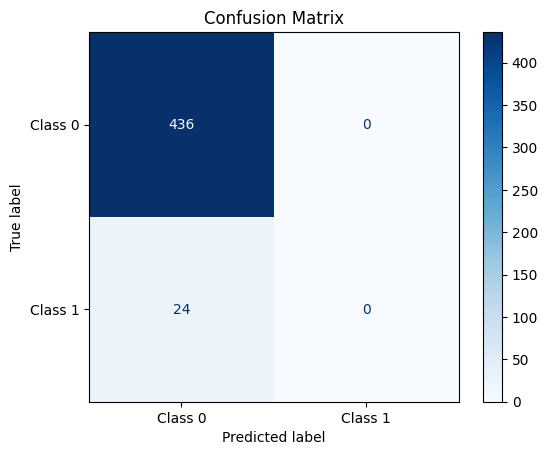

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_predicted = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_predicted)

print(f"Accuracy: {accuracy:.4f}")

# For a more detailed look at performance

print("\nClassification Report:")
print(classification_report(y_test, y_predicted))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_predicted)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues) # Customize colormap
plt.title('Confusion Matrix')
plt.show()


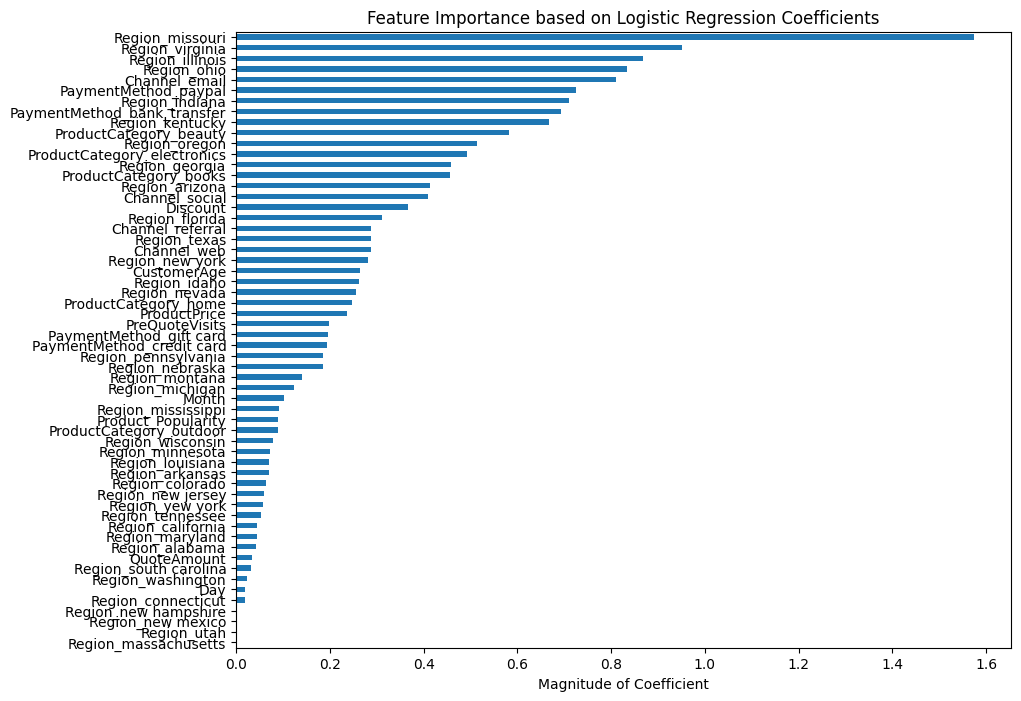

In [ ]:
coefficients = pd.Series(clf.coef_[0], index=X_train.columns)

# Plot the magnitude of the coefficients
plt.figure(figsize=(10, 8))
coefficients.abs().nlargest(60).sort_values().plot(kind='barh')
plt.title('Feature Importance based on Logistic Regression Coefficients')
plt.xlabel('Magnitude of Coefficient')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9065

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       436
           1       0.09      0.08      0.09        24

    accuracy                           0.91       460
   macro avg       0.52      0.52      0.52       460
weighted avg       0.90      0.91      0.91       460


Confusion Matrix:


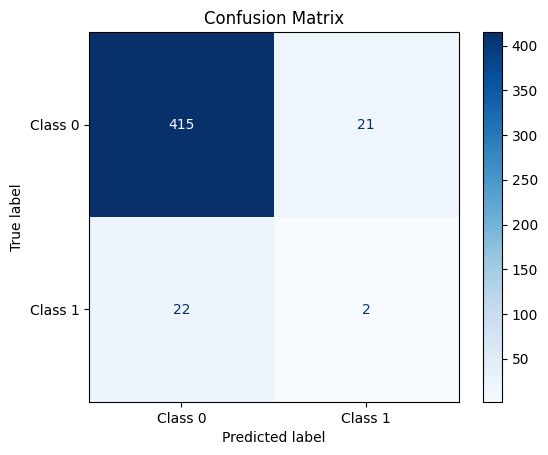

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train_resampled, y_train_resampled)
y_predicted = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_predicted)

print(f"Accuracy: {accuracy:.4f}")

# For a more detailed look at performance

print("\nClassification Report:")
print(classification_report(y_test, y_predicted))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_predicted)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues) # Customize colormap
plt.title('Confusion Matrix')
plt.show()


LightGBM Accuracy: 0.9543
Classification Report:
              precision    recall  f1-score   support

        Lost       0.95      1.00      0.98       436
         Won       1.00      0.12      0.22        24

    accuracy                           0.95       460
   macro avg       0.98      0.56      0.60       460
weighted avg       0.96      0.95      0.94       460


Confusion Matrix:
[[436   0]
 [ 21   3]]


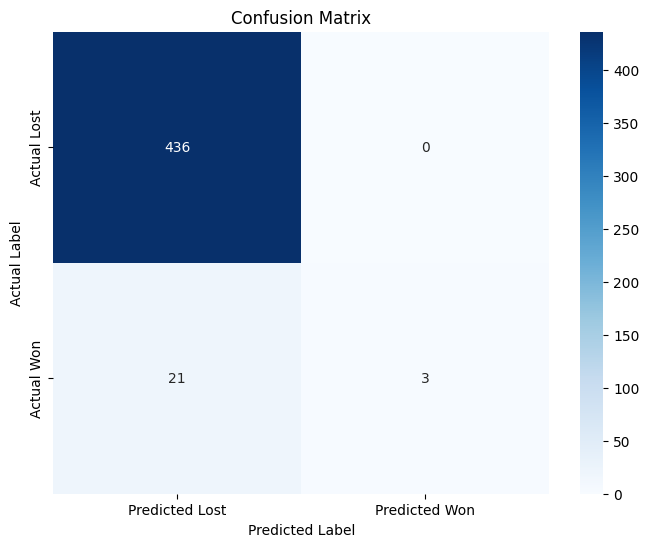

In [ ]:
import lightgbm as lgb
# train_data = lgb.Dataset(X_train, label=y_train)
# val_data = lgb.Dataset(X_train, label=y_train, reference=train_data)

lgb_params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'n_estimators': 200,
    'learning_rate': 0.05,
    'num_leaves': 15,
    'max_depth': 8,
    'seed': 42,
    'n_jobs': -1,
    'verbose': -1,
    'colsample_bytree': 0.7,
    'subsample': 0.7,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
}

lgbmodel = lgb.LGBMClassifier(**lgb_params)
lgbmodel.fit(X_train, y_train)

y_prediction = lgbmodel.predict(X_test)
accuracy = accuracy_score(y_test, y_prediction)

print(f"LightGBM Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_prediction, target_names=['Lost', 'Won']))


# --- Confusion Matrix ---
# This shows the raw counts of correct and incorrect predictions.
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_prediction)
print(cm)


# --- Visualizing the Confusion Matrix (Recommended) ---
# A heatmap makes the confusion matrix much easier to interpret.
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Lost', 'Predicted Won'],
            yticklabels=['Actual Lost', 'Actual Won'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


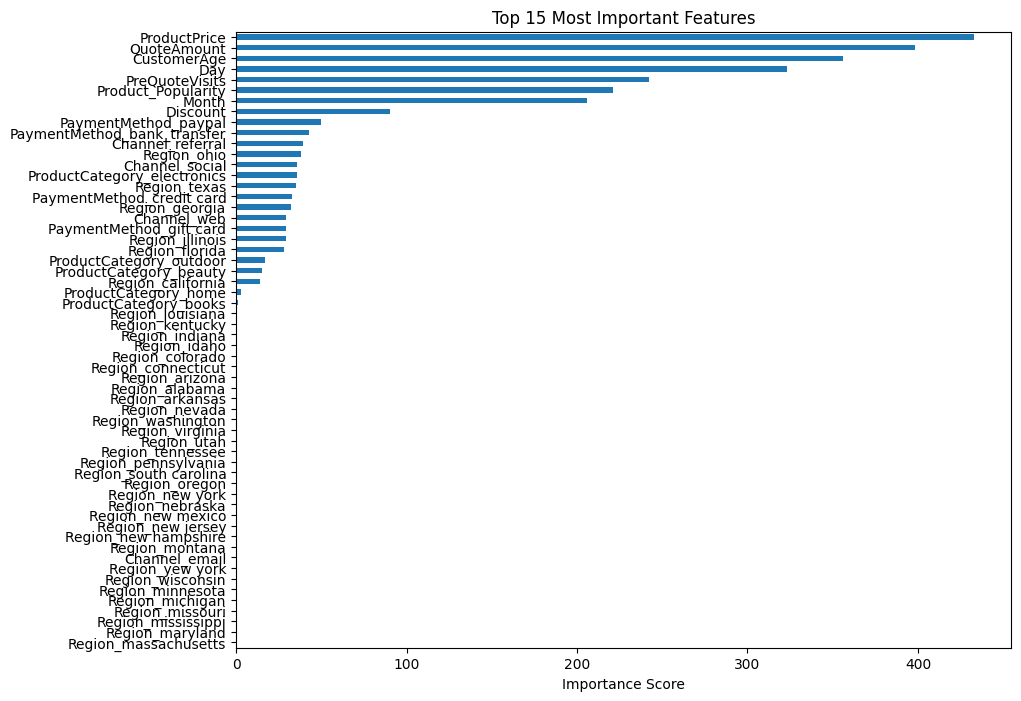

In [ ]:
importances = pd.Series(lgbmodel.feature_importances_, index=X_train.columns)

plt.figure(figsize=(10, 8))
importances.nlargest(60).sort_values().plot(kind='barh')
plt.title('Important Features')
plt.xlabel('Importance Score')
plt.show()


LightGBM Accuracy: 0.9370
Classification Report:
              precision    recall  f1-score   support

        Lost       0.95      0.98      0.97       436
         Won       0.27      0.12      0.17        24

    accuracy                           0.94       460
   macro avg       0.61      0.55      0.57       460
weighted avg       0.92      0.94      0.93       460


Confusion Matrix:
[[428   8]
 [ 21   3]]


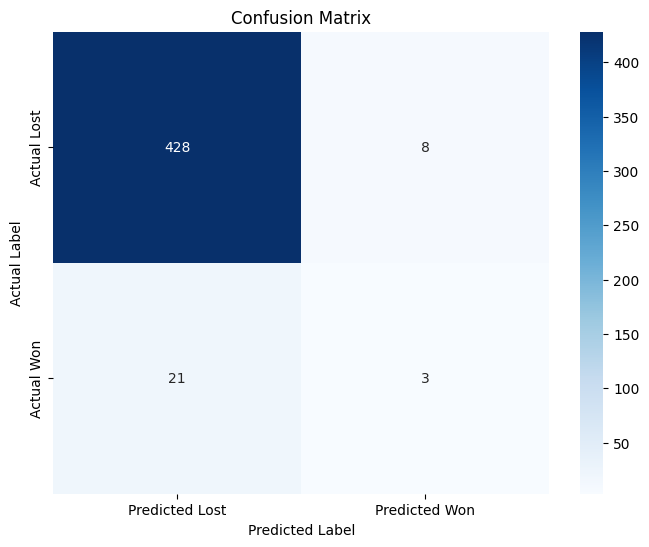

In [ ]:
import lightgbm as lgb
# train_data = lgb.Dataset(X_train, label=y_train)
# val_data = lgb.Dataset(X_train, label=y_train, reference=train_data)

lgb_params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'n_estimators': 200,
    'learning_rate': 0.05,
    'num_leaves': 15,
    'max_depth': 8,
    'seed': 42,
    'n_jobs': -1,
    'verbose': -1,
    'colsample_bytree': 0.7,
    'subsample': 0.7,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
}

lgbmodel = lgb.LGBMClassifier(**lgb_params)
lgbmodel.fit(X_train_resampled, y_train_resampled)

y_prediction = lgbmodel.predict(X_test)
accuracy = accuracy_score(y_test, y_prediction)

print(f"LightGBM Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_prediction, target_names=['Lost', 'Won']))


# --- Confusion Matrix ---
# This shows the raw counts of correct and incorrect predictions.
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_prediction)
print(cm)


# --- Visualizing the Confusion Matrix (Recommended) ---
# A heatmap makes the confusion matrix much easier to interpret.
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Lost', 'Predicted Won'],
            yticklabels=['Actual Lost', 'Actual Won'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


In [ ]:
df

,TransactionID,QuoteID,CustomerID,QuoteDate,ProductID,ProductCategory,ProductPrice,QuoteAmount,QuoteStatus,ConvertedToSale,OrderDate,Discount,Channel,CustomerAge,Region,PreQuoteVisits,QuoteToOrderTime (hrs),PaymentMethod
0,1,Q1001,C2876,2025-05-21,P373,Electronics,179.30,161.37,Pending,0,NaT,0.10,Web,33.0,Ohio,5.0,NaN,Credit Card
1,2,Q1002,C6543,2025-07-01,P125,Apparel,69.80,62.82,Lost,0,NaT,0.10,App,29.0,California,3.0,NaN,PayPal
2,3,Q1003,C4388,2025-06-15,P809,Home,249.99,237.49,Pending,0,NaT,0.05,Referral,58.0,New York,2.0,NaN,Credit Card
3,4,Q1004,C2720,2025-04-24,P223,Books,22.50,20.25,Lost,0,NaT,0.10,Web,22.0,Texas,4.0,NaN,Gift Card
4,5,Q1005,C5032,2025-07-18,P678,Beauty,89.00,75.65,Won,1,2025-07-19,0.15,App,49.0,Illinois,8.0,10.0,PayPal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,Q3096,C10110,2025-06-05,P33,Home,300.00,270.00,Lost,0,NaT,0.10,App,35.0,Ohio,5.0,NaN,PayPal
1996,1997,Q3097,C10115,2025-05-01,P35,Electronics,180.00,162.00,Lost,0,NaT,0.10,Web,42.0,California,3.0,NaN,Gift Card
1997,1998,Q3098,C10120,2025-04-15,P37,Outdoor,65.00,58.50,Lost,0,NaT,0.10,Referral,33.0,Texas,2.0,NaN,Credit Card
1998,1999,Q3099,C10125,2025-07-02,P39,Apparel,75.00,67.50,Lost,0,NaT,0.10,App,40.0,Florida,7.0,NaN,Bank Transfer


# Complement Naive Bayes

ComplementNB Accuracy: 0.8109
Classification Report:
              precision    recall  f1-score   support

        Lost       0.95      0.84      0.89       436
         Won       0.07      0.21      0.10        24

    accuracy                           0.81       460
   macro avg       0.51      0.53      0.50       460
weighted avg       0.90      0.81      0.85       460


Confusion Matrix:
[[368  68]
 [ 19   5]]


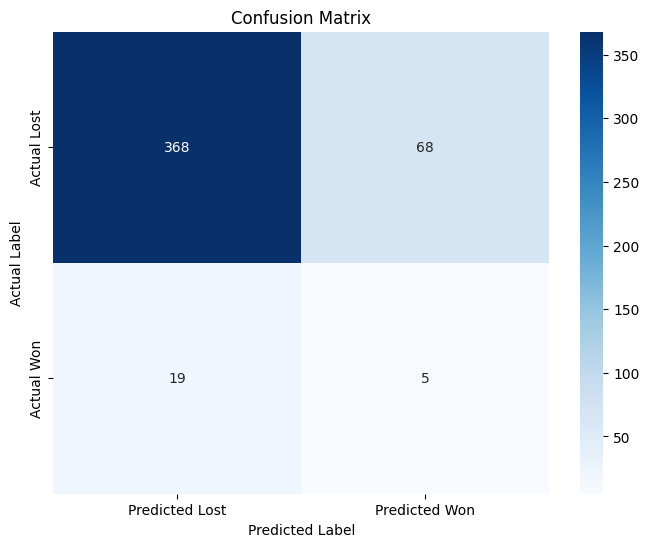

In [ ]:
from sklearn.naive_bayes import ComplementNB
clf = ComplementNB()
clf.fit(X_train, y_train)
y_prediction = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_prediction)
print(f"ComplementNB Accuracy: {accuracy:.4f}")


print("Classification Report:")
print(classification_report(y_test, y_prediction, target_names=['Lost', 'Won']))


# --- Confusion Matrix ---
# This shows the raw counts of correct and incorrect predictions.
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_prediction)
print(cm)


# --- Visualizing the Confusion Matrix (Recommended) ---
# A heatmap makes the confusion matrix much easier to interpret.
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Lost', 'Predicted Won'],
            yticklabels=['Actual Lost', 'Actual Won'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()



ComplementNB Accuracy: 0.8413
Classification Report:
              precision    recall  f1-score   support

        Lost       0.95      0.88      0.91       436
         Won       0.08      0.21      0.12        24

    accuracy                           0.84       460
   macro avg       0.52      0.54      0.52       460
weighted avg       0.91      0.84      0.87       460


Confusion Matrix:
[[382  54]
 [ 19   5]]


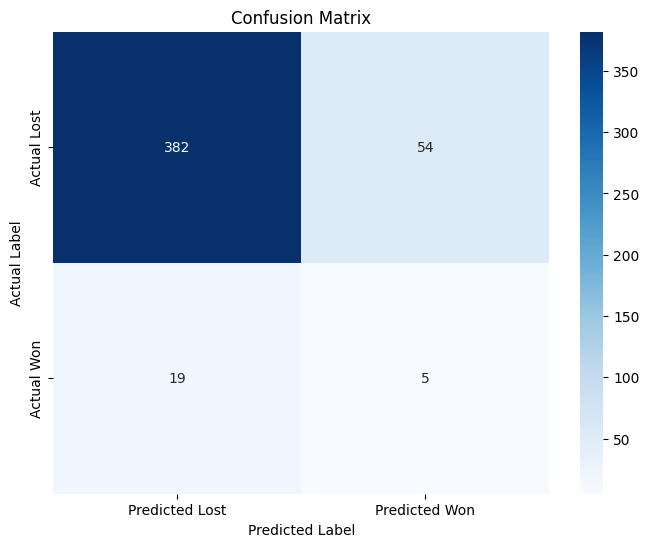

In [ ]:
from sklearn.naive_bayes import ComplementNB
clf = ComplementNB()
clf.fit(X_train_resampled, y_train_resampled)
y_prediction = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_prediction)
print(f"ComplementNB Accuracy: {accuracy:.4f}")


print("Classification Report:")
print(classification_report(y_test, y_prediction, target_names=['Lost', 'Won']))


# --- Confusion Matrix ---
# This shows the raw counts of correct and incorrect predictions.
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_prediction)
print(cm)


# --- Visualizing the Confusion Matrix (Recommended) ---
# A heatmap makes the confusion matrix much easier to interpret.
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Lost', 'Predicted Won'],
            yticklabels=['Actual Lost', 'Actual Won'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()



# New Section